<a href="https://colab.research.google.com/github/lurahayes/assignment2/blob/main/Finished_assignment2_LH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

Answers

1. This papaer is about how to efficiently make a tidy data set suitable for analysis. This means each variable is a column, each observation is a row, and each type of observational unit is a table (every observation in the table is the same unit/kind of occurance). Additionally, it emphasizes the importance of tidy data and how it makes data manipulation tactics and associated tools a lot easier to work with.

2. The tidy data standard intends to make the beginning phases of data analysis easier and more universal across coding lanugages. This makes the process of cleaning data easier by providing a baseline of starting steps.

3. The first sentence is reffering to the standardization of tidy datasets. Every tidy dataset is alike in its structure. However, untidy datasets aren't tidy for different reasons. For example, one untidy dataset could have multiple observations in one row, and another could have multiple observational units in a table. Both would be considered untidy but for vastly different reasons. The second sentence expands upon the unique nature of dataset characteristics. It's very easy to pick out individual observations and variables in a given set. For example, observations in the shark data set are individual attacks and variables are various details associated with the attack (type of shark, date, etc.) However, since these two things vary so greatly acrosss datasets, it's difficult to pinpoint an exact definition.

4. According to Wickham:

- Values make up the dataset. Each value is either a number or a string, and it is associated with a variable and an observation.
- Variables contain all values that neasure the same underlying attribute (like age, name, height)
- Observations contain all of the values for variables across one unit (person, shark attack, day)

5. Wickham describes tidy data as a standardized way of constructing datasets that makes analysis easier and less inviting for errors. A tidy dataset includes each column as a variable, each row as an observation, and each table as an observational unit.

6. The five most common problems with messy datasets include:
- column headers are values instead of variable name
- multiple values are stored in one column
- variables are stored in both rows and columns
- multiple types of observational units are stored in the same table
- a single observational unit is stored in multiple tables

The problem with table 4 is that the column headers contain values instead of variables. Additionally, variables are in both columns and rows. Melting a dataset involves turning columns into rows. This needs to occur when column headers are values rather than variables.

7. Table 11 is messy because the day number (d1, d2, d3, etc.) is a value. The table needs to be melted because values are used as column headers. Table 12a is molten because the values of column "element" are variable types. 12b is tidy because every column is a variable, every row is an observation, and the table measures one observational unit.

8. The chicken and the egg problem arises because tidy data is linked to the tools that work with it, and the tools used to work with are linked to tidy data. He mentions how independently changing tools or data structures without thought of eachother is not efficient. In the future, he wants people to create other tools for data storage, management, and structure. He also hopes to incorporate user experience into these practices, including user-testing.

In [1]:
! git clone https://www.github.com/lurahayes/assignment2

Cloning into 'assignment2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 36 (delta 8), reused 5 (delta 5), pack-reused 24
Receiving objects: 100% (36/36), 5.47 MiB | 9.46 MiB/s, done.
Resolving deltas: 100% (9/9), done.


**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import pandas as pd #importing pandas and dara
airbnb = pd.read_csv('./assignment2/data/airbnb_hw.csv')

In [3]:
print(airbnb.dtypes[11]) #inspecting price
print(airbnb["Price"].unique())

object
['145' '37' '28' '199' '549' '149' '250' '90' '270' '290' '170' '59' '49'
 '68' '285' '75' '100' '150' '700' '125' '175' '40' '89' '95' '99' '499'
 '120' '79' '110' '180' '143' '230' '350' '135' '85' '60' '70' '55' '44'
 '200' '165' '115' '74' '84' '129' '50' '185' '80' '190' '140' '45' '65'
 '225' '600' '109' '1,990' '73' '240' '72' '105' '155' '160' '42' '132'
 '117' '295' '280' '159' '107' '69' '239' '220' '399' '130' '375' '585'
 '275' '139' '260' '35' '133' '300' '289' '179' '98' '195' '29' '27' '39'
 '249' '192' '142' '169' '1,000' '131' '138' '113' '122' '329' '101' '475'
 '238' '272' '308' '126' '235' '315' '248' '128' '56' '207' '450' '215'
 '210' '385' '445' '136' '247' '118' '77' '76' '92' '198' '205' '299'
 '222' '245' '104' '153' '349' '114' '320' '292' '226' '420' '500' '325'
 '307' '78' '265' '108' '123' '189' '32' '58' '86' '219' '800' '335' '63'
 '229' '425' '67' '87' '1,200' '158' '650' '234' '310' '695' '400' '166'
 '119' '62' '168' '340' '479' '43' '395' '144

In [4]:
airbnb["Price"] = airbnb["Price"].str.replace(',','') #removing commas from prices over 1000

In [5]:
airbnb['Price'] = pd.to_numeric(airbnb['Price'], errors='coerce') #coercing price to numeric
airbnb['Price' + '_nan'] = airbnb['Price'].isnull() #making dummy in case of missing variables

In [6]:
print("missing prices total:", sum(airbnb['Price' + '_nan'])) #finding missing variables (0 yay)

missing prices total: 0


1: I inspected the dataset, realized there were commas, removed the commas, and coerced into numeric. If commas were not removed first, there would've been a missing variable for each value >1000. I created the dummy variable to check if there were missing values.

In [7]:
attack = pd.read_csv('./assignment2/data/sharks.csv') #importing shark data

<ipython-input-7-ea33b0aba61e>:1: DtypeWarning: Columns (10,17,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  attack = pd.read_csv('./assignment2/data/sharks.csv') #importing shark data


In [8]:
print(attack["Type"].unique()) #Inspecting different types of attacks
print(attack['Type'].value_counts())

['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Unconfirmed'
 'Unverified' 'Invalid' 'Under investigation' 'Boating' 'Sea Disaster' nan
 'Boat' 'Boatomg']
Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Watercraft              142
Boat                    109
Boating                  92
Questionable             10
Unconfirmed               1
Unverified                1
Under investigation       1
Boatomg                   1
Name: Type, dtype: int64


In [9]:
mapping_dict = { #Creating a dictionary to rename like variables
    "Watercraft" : "Boating",
    "Boat" : "Boating",
    "Boatomg" : "Boating",
    "Questionable" : "Invalid",
    "Unconfirmed" : "Invalid",
    "Unverified" : "Invalid",
    "Under investigation" : "Invalid"}

attack["Type"] = attack["Type"].replace(mapping_dict) #renaming like variables


In [10]:
print(attack["Type"].value_counts())

Unprovoked      4716
Provoked         593
Invalid          565
Boating          344
Sea Disaster     239
Name: Type, dtype: int64


In [11]:
import numpy as np
attack["Type"] = attack["Type"].replace("Invalid", np.nan) #Replacing Invalid labelled attacks with NAN

In [12]:
print(attack["Type"].value_counts())

Unprovoked      4716
Provoked         593
Boating          344
Sea Disaster     239
Name: Type, dtype: int64


2. I decided to merge all of the values in Type that meant the same thing. I made Invalid into a NAN because it means that the type of the attack is unknown.

In [13]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
trial = pd.read_csv(url,low_memory=False) #Loading in trial data

In [14]:
print(trial["WhetherDefendantWasReleasedPretrial"].unique()) #checking the variable

[9 0 1]


In [15]:
trial = trial.rename(columns = { #renaming long variable
    'WhetherDefendantWasReleasedPretrial' : "Released"})

In [16]:
print(trial["Released"].unique())
print(trial["Released"].value_counts())

[9 0 1]
1    19154
0     3801
9       31
Name: Released, dtype: int64


In [17]:
trial["Released"] = trial["Released"].replace( [9], np.nan) #creating nan for missing values
print(trial["Released"].value_counts())

1.0    19154
0.0     3801
Name: Released, dtype: int64


3. I renamed the long variable name and turned 9 into missing values. I did this because there were relatively few of them in the dataset, and I do not have a way of knowing what they are because they're typos.

In [18]:
trial = trial.rename(columns = { #renaming long variable
    'ImposedSentenceAllChargeInContactEvent' : 'impsent'})

In [19]:
print(trial["impsent"].unique())

[' ' '60' '12' '.985626283367556' '36' '6' '24' '5.91375770020534' '120'
 '72' '11.9917864476386' '0' '2.95687885010267' '84' '108' '300' '240'
 '180' '4' '96' '2' '54' '.328542094455852' '44' '5' '115' '132' '48'
 '258' '34' '76' '.164271047227926' '.131416837782341' '111' '9' '3'
 '1.97125256673511' '36.9856262833676' '.0657084188911704'
 '35.4928131416838' '106.492813141684' '8' '35' '18.3141683778234' '480'
 '32' '93' '234' '732' '1.16427104722793' '4.6570841889117' '21' '7'
 '4.49281314168378' '18' '600' '43.1642710472279' '179' '52' '30' '20'
 '192' '702' '14' '55' '53' '11.9055441478439' '114' '35.0061601642711'
 '68' '.657084188911704' '46.6242299794661' '102' '65' '200' '57'
 '24.3285420944559' '12.1642710472279' '117' '81.4928131416838'
 '22.4928131416838' '1980' '3.6570841889117' '56' '10' '2.79260780287474'
 '1' '47' '22' '1500' '40' '284' '11' '118' '42' '162' '156'
 '47.2956878850103' '105' '51' '246' '29' '75' '324' '360'
 '34.4804928131417' '120.328542094456' '59.926078

In [20]:
print(trial["SentenceTypeAllChargesAtConvictionInContactEvent"].unique())

[9 0 1 4 2]


9 means not applicable or not found so we have to turn the " " into nan.

In [21]:
trial['impsent'] = pd.to_numeric(trial['impsent'], errors='coerce') # Coerce number of months to numeric

trial['impsent'+'_nan'] = trial['impsent'].isnull() #Giving missing value dummy to the missing values

print('Total missing:' , sum(trial['impsent'+'_nan']),'\n') # Looking at how many are missing

Total missing: 9053 



In [22]:
print(trial["impsent"].unique())

[           nan 6.00000000e+01 1.20000000e+01 9.85626283e-01
 3.60000000e+01 6.00000000e+00 2.40000000e+01 5.91375770e+00
 1.20000000e+02 7.20000000e+01 1.19917864e+01 0.00000000e+00
 2.95687885e+00 8.40000000e+01 1.08000000e+02 3.00000000e+02
 2.40000000e+02 1.80000000e+02 4.00000000e+00 9.60000000e+01
 2.00000000e+00 5.40000000e+01 3.28542094e-01 4.40000000e+01
 5.00000000e+00 1.15000000e+02 1.32000000e+02 4.80000000e+01
 2.58000000e+02 3.40000000e+01 7.60000000e+01 1.64271047e-01
 1.31416838e-01 1.11000000e+02 9.00000000e+00 3.00000000e+00
 1.97125257e+00 3.69856263e+01 6.57084189e-02 3.54928131e+01
 1.06492813e+02 8.00000000e+00 3.50000000e+01 1.83141684e+01
 4.80000000e+02 3.20000000e+01 9.30000000e+01 2.34000000e+02
 7.32000000e+02 1.16427105e+00 4.65708419e+00 2.10000000e+01
 7.00000000e+00 4.49281314e+00 1.80000000e+01 6.00000000e+02
 4.31642710e+01 1.79000000e+02 5.20000000e+01 3.00000000e+01
 2.00000000e+01 1.92000000e+02 7.02000000e+02 1.40000000e+01
 5.50000000e+01 5.300000

4. I changed the name of the variable. Then I used the other variable to figure out that 9 meant the information for their jailtime was not found, so i changed the missing values into nan.

**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [23]:
college = pd.read_csv('./assignment2/data/college_completion.csv')
import matplotlib.pyplot as plt

In [24]:
print(college.columns.tolist(), '\n')
print(college.shape, '\n')
print(college.dtypes, '\n')
print(college.head(), '\n')
print(college['level'].value_counts, '\n')
print(college['aid_value'].value_counts, '\n')
print(college['control'].value_counts, '\n')
print(college['grad_100_value'].value_counts, '\n')
print(college.describe())

['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count', 'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value', 'grad_100_percentile', 'grad_150_value', 'grad_150_percentile', 'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value', 'ft_fac_percentile', 'vsa_year', 'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first', 'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first', 'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first', 'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first', 'vsa_grad_after4_transfer', 'vsa_grad_elsewhere_after4_transfer', 'vsa_enroll_after4_transfer', 'vs

There are 63 variables and 3798 observations.

In [25]:
pd.crosstab(college["control"], college["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


there are relatively few private non-profit that're 2 year. Public colleges are more likely to be 2 year. private for profit are more equally distributed, but have more 4-year.

In [26]:
print(college['grad_100_value'].describe())

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


Axes(0.125,0.11;0.775x0.77)


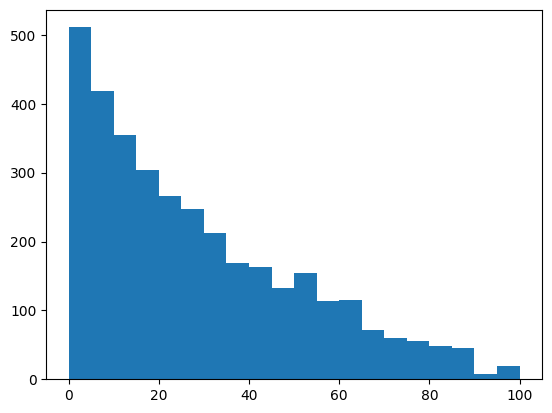

In [27]:
print(college['grad_100_value'].hist(bins=20, grid=False))

Axes(0.125,0.11;0.775x0.77)


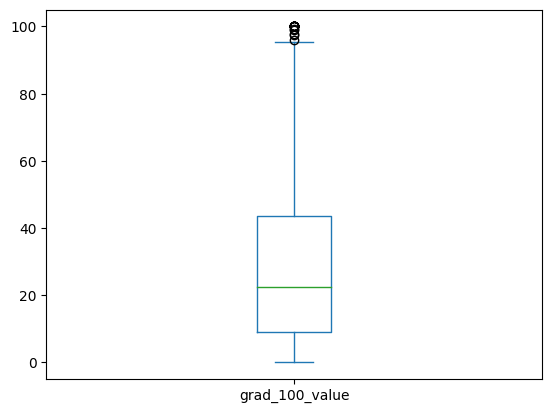

In [28]:
print(college['grad_100_value'].plot.box())

<Axes: ylabel='Density'>

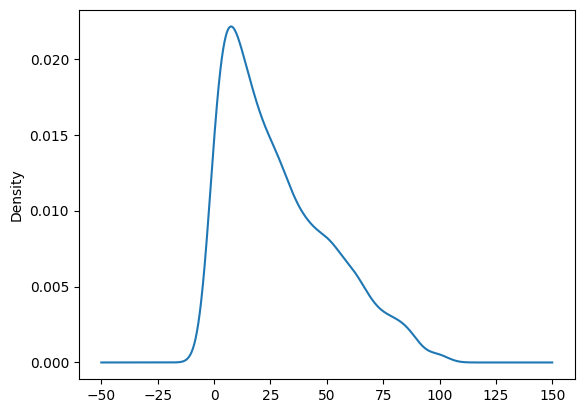

In [29]:
college['grad_100_value'].plot.density()

<Axes: ylabel='Density'>

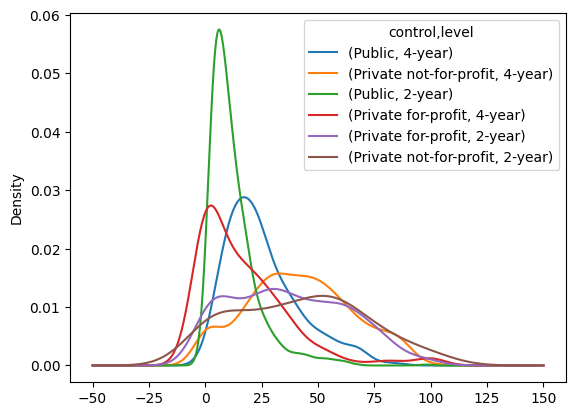

In [30]:
group_by = 'control', 'level'
var = 'grad_100_value'
df_wide = college.pivot(columns=group_by,values=var)
df_wide.plot.density()

The highest density of low on-time graduation rates is for public, 2-year colleges

In [31]:
college.groupby('grad_100_value')['control', 'level'].describe()

<ipython-input-31-adb615daa6a6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  college.groupby('grad_100_value')['control', 'level'].describe()


control                                 level                 \
                 count unique                 top freq count unique     top   
grad_100_value                                                                
0.0                219      3  Private for-profit  140   219      2  4-year   
0.3                  3      2  Private for-profit    2     3      1  4-year   
0.4                  1      1  Private for-profit    1     1      1  4-year   
0.5                  2      2              Public    1     2      2  2-year   
0.6                  3      2              Public    2     3      2  2-year   
...                ...    ...                 ...  ...   ...    ...     ...   
97.4                 1      1  Private for-profit    1     1      1  2-year   
97.8                 1      1              Public    1     1      1  2-year   
99.0                 1      1  Private for-profit    1     1      1  2-year   
99.2                 1      1  Private for-profit    1     1      1  2-year   
100.0               13      2  Private for-profit    7    13      2  4-year   

                     
               freq  
grad_100_value       
0.0             163  
0.3               3  
0.4               1  
0.5               1  
0.6               2  
...             ...  
97.4              1  
97.8              1  
99.0              1  
99.2              1  
100.0             9  

[806 rows x 8 columns]

The institutions with the best graduation rates are 4-year private for profit schools.

In [32]:
college['levelXcontrol']=college['level'] * college['control']

TypeError: ignored

In [33]:
var = 'levelXcontrol'
grouped = 'level', 'control'

df_wide = college.pivot(columns=grouped,values=var)
df_wide.plot.density()

KeyError: ignored

<Axes: ylabel='Density'>

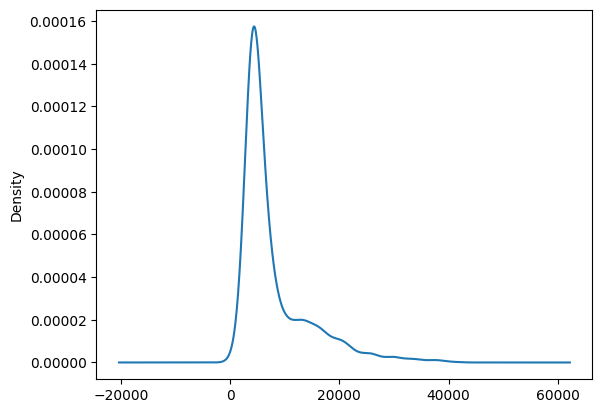

In [34]:
college['aid_value'].plot.density()

<Axes: ylabel='Density'>

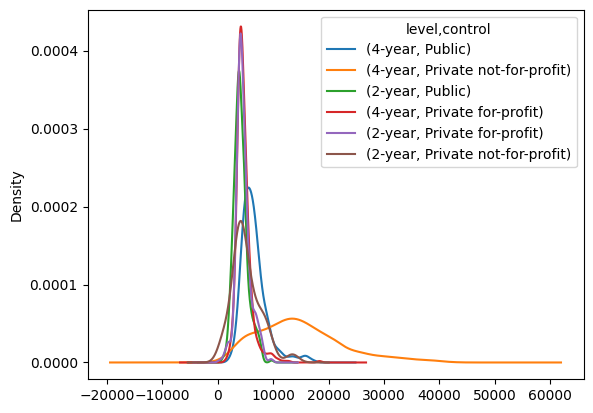

In [35]:
var = 'aid_value'
grouped = 'level', 'control'

df_wide = college.pivot(columns=grouped,values=var)
df_wide.plot.density()

The two peaks come mainly from the 4-year, public univerisities.

In [36]:
college.groupby('aid_value')['control', 'level'].describe()

<ipython-input-36-971f081330d8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  college.groupby('aid_value')['control', 'level'].describe()


control                                     level                 \
            count unique                     top freq count unique     top   
aid_value                                                                    
294.0           1      1      Private for-profit    1     1      1  2-year   
881.0           1      1                  Public    1     1      1  2-year   
902.0           1      1  Private not-for-profit    1     1      1  4-year   
920.0           1      1      Private for-profit    1     1      1  2-year   
934.0           1      1  Private not-for-profit    1     1      1  2-year   
...           ...    ...                     ...  ...   ...    ...     ...   
39161.0         1      1  Private not-for-profit    1     1      1  4-year   
39176.0         1      1  Private not-for-profit    1     1      1  4-year   
39802.0         1      1  Private not-for-profit    1     1      1  4-year   
41085.0         1      1  Private not-for-profit    1     1      1  4-year   
41580.0         1      1  Private not-for-profit    1     1      1  4-year   

                
          freq  
aid_value       
294.0        1  
881.0        1  
902.0        1  
920.0        1  
934.0        1  
...        ...  
39161.0      1  
39176.0      1  
39802.0      1  
41085.0      1  
41580.0      1  

[3135 rows x 8 columns]

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

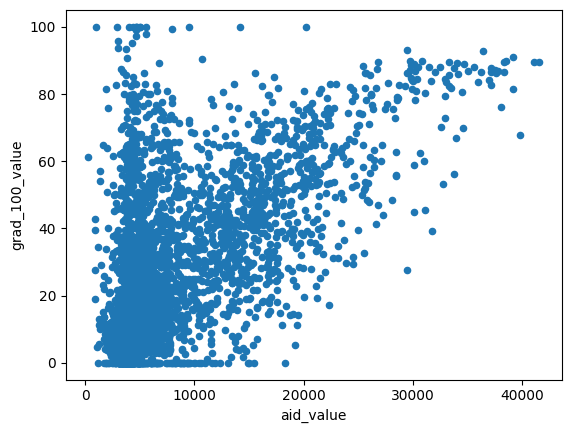

In [37]:
college.plot.scatter(y='grad_100_value',x='aid_value')

8. The more aid received means the more people that graduate within the expected time period.

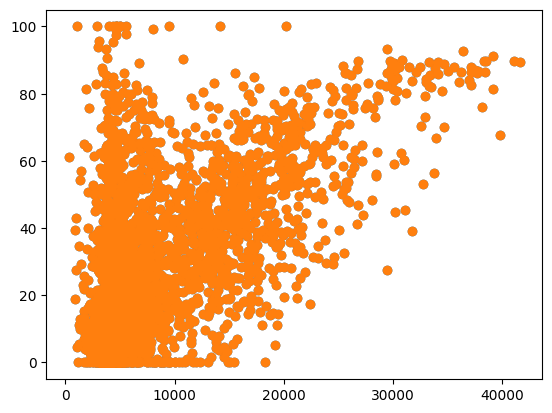

In [38]:
groups = 'level', 'control'

for q in groups:
    plt.scatter(college['aid_value'], college['grad_100_value'], label=groups)

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.